#### Library



In [3]:
import pandas as pd
import numpy as np
import datetime as dt

#### Load Data

In [4]:
data = pd.read_excel('Superstore.xlsx')

In [5]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Country,Market,Region,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York,United States,US,East,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,Yes
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,New South Wales,Australia,APAC,Oceania,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,1288.7650,923.63,Critical,No
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Queensland,Australia,APAC,Oceania,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,No
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,Germany,EU,Central,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,NaN
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,Rick Hansen,Consumer,Dakar,Senegal,Africa,Africa,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer Name   51290 non-null  object        
 5   Segment         51290 non-null  object        
 6   State           51290 non-null  object        
 7   Country         51290 non-null  object        
 8   Market          51290 non-null  object        
 9   Region          51290 non-null  object        
 10  Product ID      51290 non-null  object        
 11  Category        51290 non-null  object        
 12  Sub-Category    51290 non-null  object        
 13  Product Name    51290 non-null  object        
 14  Sales           51290 non-null  float64       
 15  Qu

In [7]:
data_new = pd.DataFrame()

In [8]:
data_new['recency'] = data['Order Date'].values
data_new

,recency
0,2012-07-31
1,2013-02-05
2,2013-10-17
3,2013-01-28
4,2013-11-05
...,...
51285,2014-06-19
51286,2014-06-20
51287,2013-12-02
51288,2012-02-18


In [9]:
data_new['recency'] = data_new['recency'].apply(lambda x: dt.datetime.today() - x )

In [10]:
data_new.recency = data_new.recency.astype('string')

In [11]:
data_new['recency'] = data_new['recency'].str.split(' ').str[0]

In [12]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   recency  51290 non-null  object
dtypes: object(1)
memory usage: 400.8+ KB


In [13]:
data_new['orde_dt'] = data['Order Date']

In [14]:
data_new['cust'] = data['Customer Name']

In [15]:
data_new['ord_id'] = data['Order ID']

In [16]:
data_new['sales'] = data['Sales']

In [17]:
data.groupby(['Customer Name']).count()

,Order ID,Order Date,Ship Date,Ship Mode,Segment,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned
Customer Name,,,,,,,,,,,,,,,,,,,,
Aaron Bergman,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,0
Aaron Hawkins,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,0
Aaron Smayling,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,0
Adam Bellavance,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,0
Adam Hart,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xylona Preis,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,0
Yana Sorensen,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,0
Yoseph Carroll,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,0


In [18]:
data_new

,recency,orde_dt,cust,ord_id,sales
0,4091,2012-07-31,Rick Hansen,CA-2012-124891,2309.650
1,3902,2013-02-05,Justin Ritter,IN-2013-77878,3709.395
2,3648,2013-10-17,Craig Reiter,IN-2013-71249,5175.171
3,3910,2013-01-28,Katherine Murray,ES-2013-1579342,2892.510
4,3629,2013-11-05,Rick Hansen,SG-2013-4320,2832.960
...,...,...,...,...,...
51285,3403,2014-06-19,Katrina Edelman,IN-2014-62366,65.100
51286,3402,2014-06-20,Zuschuss Carroll,US-2014-102288,0.444
51287,3602,2013-12-02,Laurel Beltran,US-2013-155768,22.920
51288,4255,2012-02-18,Ross Baird,MX-2012-140767,13.440


In [19]:
data_1 = pd.DataFrame()
data_1['recency'] = data_new.groupby('cust')['recency'].min()

In [20]:
data_1['frequency'] = data_new.groupby('cust')['ord_id'].count()

In [21]:
data_1

,recency,frequency
cust,,
Aaron Bergman,3224,89
Aaron Hawkins,3220,56
Aaron Smayling,3231,60
Adam Bellavance,3243,68
Adam Hart,3210,84
...,...,...
Xylona Preis,3251,61
Yana Sorensen,3212,62
Yoseph Carroll,3212,56


In [22]:
data_1['sales'] = data_new.groupby('cust')['sales'].sum()

In [23]:
data_1

,recency,frequency,sales
cust,,,
Aaron Bergman,3224,89,24644.62750
Aaron Hawkins,3220,56,20759.51384
Aaron Smayling,3231,60,14212.62840
Adam Bellavance,3243,68,20186.77840
Adam Hart,3210,84,21718.20142
...,...,...,...
Xylona Preis,3251,61,12198.95060
Yana Sorensen,3212,62,20032.43800
Yoseph Carroll,3212,56,20164.37760


In [24]:
data_1['recency'] = data_1.recency.astype('int64')

In [25]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795 entries, Aaron Bergman to Zuschuss Donatelli
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    795 non-null    int64  
 1   frequency  795 non-null    int64  
 2   sales      795 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 24.8+ KB


In [26]:
data_1['q_recency'] = pd.qcut(data_1['recency'] , 4 , labels=False)

In [27]:
data_1['q_frequency'] = pd.qcut(data_1['frequency'] , 4 , labels=False)
data_1['q_monetary'] = pd.qcut(data_1['sales'] , 4 , labels=False)

In [28]:
data_1

,recency,frequency,sales,q_recency,q_frequency,q_monetary
cust,,,,,,
Aaron Bergman,3224,89,24644.62750,1,3,3
Aaron Hawkins,3220,56,20759.51384,1,1,3
Aaron Smayling,3231,60,14212.62840,2,1,1
Adam Bellavance,3243,68,20186.77840,3,2,3
Adam Hart,3210,84,21718.20142,0,3,3
...,...,...,...,...,...,...
Xylona Preis,3251,61,12198.95060,3,1,0
Yana Sorensen,3212,62,20032.43800,0,1,3
Yoseph Carroll,3212,56,20164.37760,0,1,3


In [29]:
status = []

for i in data_1['q_recency']:
    if i == 0:
        status.append('Active')
    elif i == 1 or i == 2:
        status.append('Risky')
    else:
        status.append('Churned')
        

In [30]:
data_1['Status'] = pd.Series(status).values

In [31]:
data_1

,recency,frequency,sales,q_recency,q_frequency,q_monetary,Status
cust,,,,,,,
Aaron Bergman,3224,89,24644.62750,1,3,3,Risky
Aaron Hawkins,3220,56,20759.51384,1,1,3,Risky
Aaron Smayling,3231,60,14212.62840,2,1,1,Risky
Adam Bellavance,3243,68,20186.77840,3,2,3,Churned
Adam Hart,3210,84,21718.20142,0,3,3,Active
...,...,...,...,...,...,...,...
Xylona Preis,3251,61,12198.95060,3,1,0,Churned
Yana Sorensen,3212,62,20032.43800,0,1,3,Active
Yoseph Carroll,3212,56,20164.37760,0,1,3,Active


In [32]:
f = data_1['q_frequency']
m = data_1['q_monetary']
sum_d = {0:'',1:'',2:'Silver',3:'Silver',4:'Gold',5:'Gold',6:'Premium'}

sum_fm = f+m

data_1['Customer_value'] = sum_fm.map(sum_d)

In [33]:
data_1

,recency,frequency,sales,q_recency,q_frequency,q_monetary,Status,Customer_value
cust,,,,,,,,
Aaron Bergman,3224,89,24644.62750,1,3,3,Risky,Premium
Aaron Hawkins,3220,56,20759.51384,1,1,3,Risky,Gold
Aaron Smayling,3231,60,14212.62840,2,1,1,Risky,Silver
Adam Bellavance,3243,68,20186.77840,3,2,3,Churned,Gold
Adam Hart,3210,84,21718.20142,0,3,3,Active,Premium
...,...,...,...,...,...,...,...,...
Xylona Preis,3251,61,12198.95060,3,1,0,Churned,
Yana Sorensen,3212,62,20032.43800,0,1,3,Active,Gold
Yoseph Carroll,3212,56,20164.37760,0,1,3,Active,Gold


In [34]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2a79b5dd150>,
 [Text(-1.0999463210527771, 0.010866959209503516, 'Risky'),
  Text(0.8057231956149096, -0.7488725739724338, 'Active'),
  Text(0.7408762849516649, 0.8130819948788802, 'Churned')],
 [Text(-0.5999707205742421, 0.005927432296092826, '50%'),
  Text(0.43948537942631427, -0.40847594943950927, '27%'),
  Text(0.40411433724636264, 0.4434992699339346, '24%')])

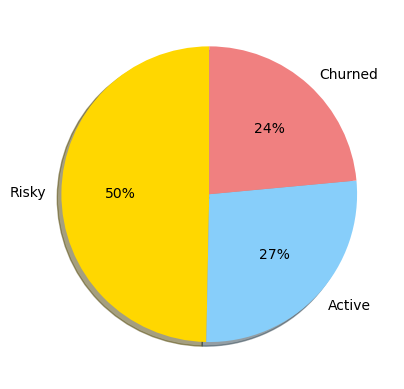

In [35]:
new=list(data_1['Status'].value_counts())               #get a list to fed to the pie chart
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(new, labels=["Risky","Active","Churned"] , autopct='%0.f%%', colors=colors, shadow=True, startangle=90)